# Logistic Regression

- what is logistic regression?
- how do we do logistic regression with python? statsmodels + scikit-learn
- validate data splits
- analyzing + evaluating our models

What is logistic regression?

$$ \frac{1}{1 + e^{-\sum{\beta_ix_i}}} $$

- OLS + **logit** function.
- a **logit** function produces a number between 0 and 1
- output is a number between 0 and 1 -- the probability of an observation being in the positive class

- Pros
    - fast to train, very fast to predict
    - probabilities of being in the positive class
    - more interpretable than some other classification models
- Cons
    - less interpretable than some other classification models
    - assume the X predictors are independent
    - multi-class classification is more complicated (**one-vs-rest**)
- Great baseline

## Simple Example

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import logistic_regression_util

df = logistic_regression_util.get_macbook_data()
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,macbook,coolness
0,0,54.956441
1,1,83.861864
2,0,32.272913
3,0,47.948627
4,0,43.142720


In [2]:
df.groupby('macbook').coolness.mean()

macbook
0    39.907738
1    77.271640
Name: coolness, dtype: float64

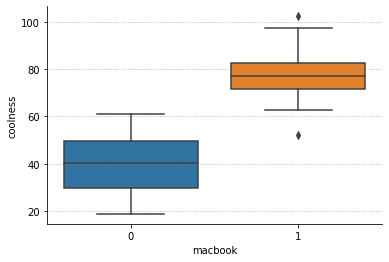

In [3]:
# show the distribution of coolness by macbook
sns.boxplot(y='coolness', x='macbook', data=df)

In [4]:
model = smf.logit('macbook ~ coolness', df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.114322
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                macbook   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.8339
Time:                        13:58:49   Log-Likelihood:                -4.5729
converged:                       True   LL-Null:                       -27.526
Covariance Type:            nonrobust   LLR p-value:                 1.241e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.6135      7.377     -2.523      0.012     -33.071      -4.156
coolness       0.3147      0.127      2.484      0.013       0.066       0.563
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [5]:
# predictions are a number between 0 and 1
# predictions are P(y = 1)
# predictions are P(macbook)
model.predict()

array([2.11379840e-01, 9.99582579e-01, 2.12578024e-04, 2.86857015e-02,
       6.46509705e-03, 3.72343934e-05, 1.73186574e-01, 9.89628612e-01,
       9.99918963e-01, 1.16065203e-03, 9.97816574e-01, 9.79229978e-01,
       1.04605441e-02, 9.59817988e-02, 8.57953514e-02, 9.87417001e-01,
       3.03231868e-06, 9.97573864e-01, 9.98606414e-01, 1.62495955e-03,
       1.73360477e-04, 1.54396972e-05, 9.82548623e-01, 7.55450488e-01,
       9.95204232e-01, 2.97974925e-02, 9.99515152e-01, 7.93369411e-05,
       2.41278531e-04, 5.32611307e-05, 6.32962774e-01, 9.99998772e-01,
       9.23617834e-01, 9.64293581e-01, 4.26008167e-03, 8.97404348e-02,
       9.98719147e-01, 5.84873143e-02, 7.96708415e-05, 9.99994378e-01])

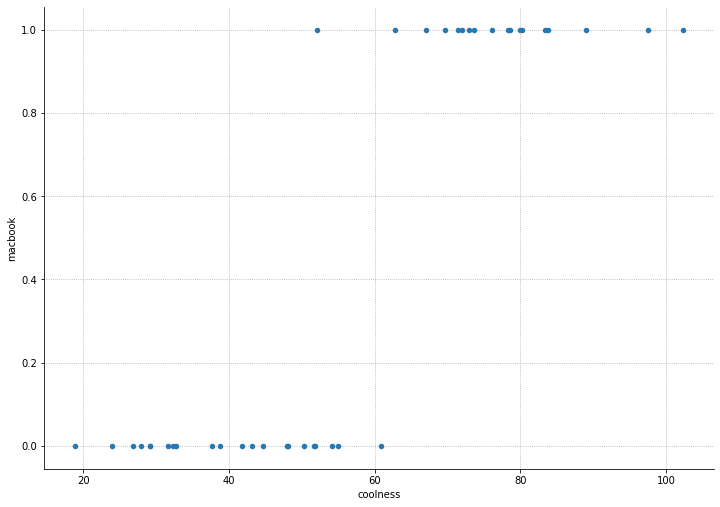

In [6]:
df.plot.scatter(y='macbook', x='coolness', figsize=(12, 8.5))

In [7]:
df['prediction'] = model.predict(df)
df.head()

,macbook,coolness,prediction
0,0,54.956441,0.211380
1,1,83.861864,0.999583
2,0,32.272913,0.000213
3,0,47.948627,0.028686
4,0,43.142720,0.006465


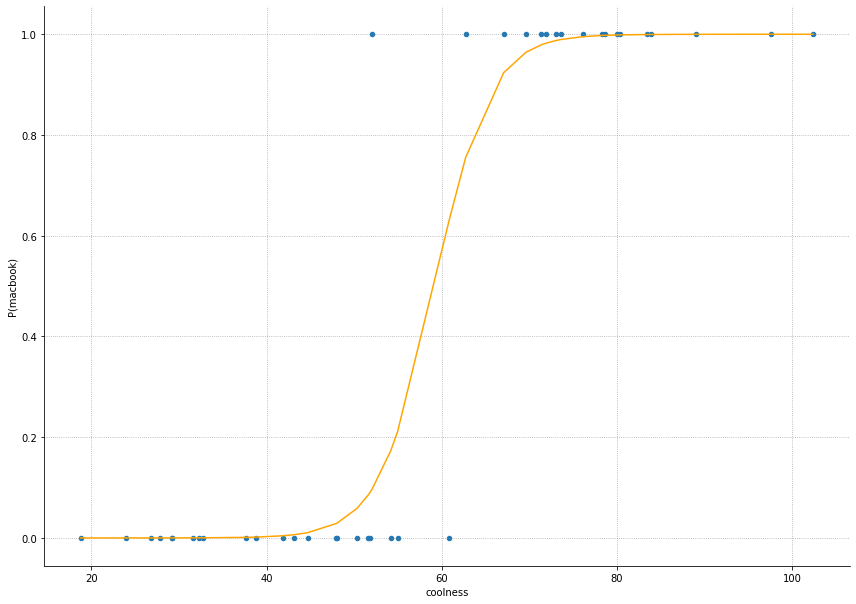

In [8]:
ax = df.plot.scatter(y='macbook', x='coolness', figsize=(12, 8.5))
df.set_index('coolness').sort_index().prediction.plot(ax=ax, color='orange')
ax.set(ylabel='P(macbook)')
plt.tight_layout()

- What we have -> probabilities
- What we want -> 1 or 0
- How do we go from probabilities to predictions?

We choose a **threshold** such that if $P(y = 1) > t$, we predict 1, else we predict 0.

In [9]:
t = .1
df['yhat'] = (df.prediction > t).astype(int)

# accuracy
(df.yhat == df.macbook).mean()

0.9

- Precision: how good are our positive predictions?
- Recall: How many of the actually positive cases do we get?
- When t = 0, predict + for everything, recall
- When t = 1, predict - for everything, As t increases, we expect precision to rise as well

## Mini Exercise

1. Load the titanic dataset that you've put together from previous lessons.
2. Split your data into training and test.
3. Fit a logistic regression model on your training data using sklearn's
   linear_model.LogisticRegression class. Use fare and pclass as the
   predictors.
4. Use the model's `.predict` method. What is the output?
5. Use the model's `.predict_proba` method. What is the output? Why do you
   think it is shaped like this?
6. Evaluate your model's predictions on the test data set. How accurate
   is the mode? How does changing the threshold affect this?

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic = sns.load_dataset('titanic')[['fare', 'pclass', 'survived']]
train, test = train_test_split(titanic, random_state=123, train_size=.8)

X = train[['fare', 'pclass']]
y = train.survived

model = LogisticRegression(random_state=123).fit(X, y)

In [11]:
# unique values from the y variable
model.classes_

array([0, 1])

In [12]:
pd.DataFrame(model.predict_proba(X), columns=model.classes_)

,0,1
0,0.373222,0.626778
1,0.738207,0.261793
2,0.738643,0.261357
3,0.738220,0.261780
4,0.367825,0.632175
...,...,...
707,0.574824,0.425176
708,0.585981,0.414019
709,0.738061,0.261939
710,0.738622,0.261378


In [13]:
train['yhat'] = model.predict(X)
train['p_survived'] = model.predict_proba(X)[:, 1]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
model.score(X, y)

0.672752808988764

In [15]:
accuracy_score(train.survived, train.yhat)

0.672752808988764

In [16]:
precision_score(train.survived, train.yhat, average=None)

array([0.68498168, 0.63253012])

In [17]:
recall_score(train.survived, train.yhat)

0.37906137184115524

In [18]:
t = .25
train['yhat'] = train.p_survived > t

accuracy_score(train.survived, train.yhat), precision_score(train.survived, train.yhat), recall_score(train.survived, train.yhat)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.3890449438202247, 0.3890449438202247, 1.0)

## More Complicated Example

- **validate data split** lets us compare models, tweak hyperparams, experiment with thresholds without leaking information from the test split
- train: fit models -- majority of our data
- validate: compare models, choose hyperparams, thresholds -- ~ 20% of our data
- test: to get an idea of *out of sample error* -- ~20% of our data

In [19]:
df = sns.load_dataset('titanic')[['fare', 'sex', 'pclass', 'survived']]
df.head()

,fare,sex,pclass,survived
0,7.2500,male,3,0
1,71.2833,female,1,1
2,7.9250,female,3,1
3,53.1000,female,1,1
4,8.0500,male,3,0


In [20]:
train, test = train_test_split(df, random_state=123, train_size=.86)
train, validate = train_test_split(train, random_state=123, train_size=.83)

print('    test: %d rows x %d columns' % test.shape)
print('   train: %d rows x %d columns' % train.shape)
print('validate: %d rows x %d columns' % validate.shape)

    test: 125 rows x 4 columns
   train: 635 rows x 4 columns
validate: 131 rows x 4 columns


In [21]:
model = smf.logit('survived ~ fare + sex + pclass', train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.465616
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  635
Model:                          Logit   Df Residuals:                      631
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.3088
Time:                        13:58:50   Log-Likelihood:                -295.67
converged:                       True   LL-Null:                       -427.76
Covariance Type:            nonrobust   LLR p-value:                 5.559e-57
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3313      0.442      7.534      0.000       2.465       4.198
sex[T.male]    -2.6712      0.219    -12.223      0.000      -3.099      -2.243
fare            0.0005      0.003      0.187      0.852      -0.004       0.005
pclass         -0.9301      0.147     -6.348      0.000      -1.217      -0.643
===============================================================================
"""

In [22]:
probs = model.predict(train)
actual = train.survived

In [23]:
validate.survived.mean()

0.35877862595419846

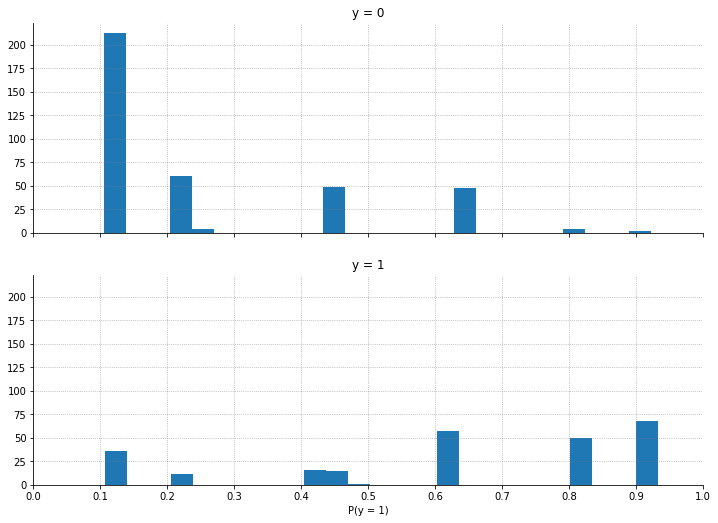

In [26]:
logistic_regression_util.plot_true_by_probs(actual, probs, subplots=True)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


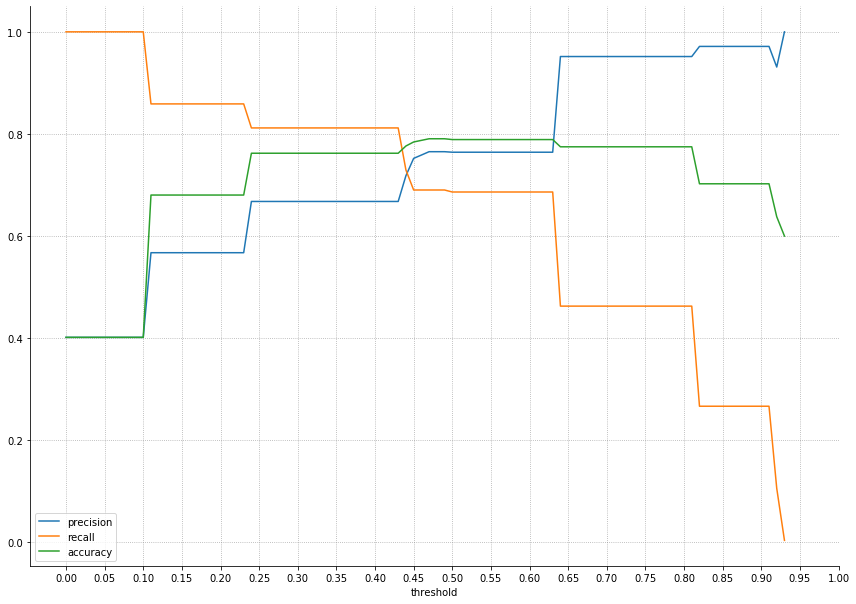

In [25]:
logistic_regression_util.plot_metrics_by_thresholds(actual, probs)

In [27]:
t = .55
probs = model.predict(test)
yhat = (probs > t).astype(int)
actual = test.survived

accuracy_score(actual, yhat)

0.816